A Jupyter Notebook that fetches data from a URL in CSV format and generates various plots:
* Temperature: Visualize the temperature over time.
* Daily Mean Temperature: Calculate and plot the average temperature for each day.
* Monthly Mean Temperature: Calculate and plot the average temperature for each month.
* Windspeed: Visualize the windspeed over time.
* Rolling Windspeed: Calculate and plot the rolling windspeed over a 24-hour period.
* Daily Max Windspeed: Find and plot the maximum wind speed for each day.
* Monthly Mean of Daily Max Windspeeds: Calculate and plot the monthly average of the daily maximum wind speeds.

The data set is obtained from: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Author: Tomasz Uszynski

***

### Preparing the data:

First of all is necessary to organise libraries. 

In [1]:
# Importing the required libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

The next step is reading data from the CSV file. In this case, it is mandatory to remove 23 rows from the data set. The skipped rows represent the description of the data set. The `head()` is used to examine the data set.

In [2]:
# Taking data from the URL and dropping 23 rows from the top.
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)
df.head(3)

C:\Users\samsu\AppData\Local\Temp\ipykernel_21520\729475365.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Checking data types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    247674 non-null  object 
 1   ind     247674 non-null  int64  
 2   rain    247674 non-null  object 
 3   ind.1   247674 non-null  int64  
 4   temp    247674 non-null  float64
 5   ind.2   247674 non-null  int64  
 6   wetb    247674 non-null  float64
 7   dewpt   247674 non-null  float64
 8   vappr   247674 non-null  float64
 9   rhum    247674 non-null  int64  
 10  msl     247674 non-null  object 
 11  ind.3   247674 non-null  int64  
 12  wdsp    247674 non-null  object 
 13  ind.4   247674 non-null  int64  
 14  wddir   247674 non-null  object 
 15  ww      247674 non-null  object 
 16  w       247674 non-null  object 
 17  sun     247674 non-null  float64
 18  vis     247674 non-null  object 
 19  clht    247674 non-null  object 
 20  clamt   247674 non-null  object 
dtypes: float64

For plotting, it is necessary to convert the date columns to the datetime format.

In [4]:
# Convert date column to datetime 
df['date'] = pd.to_datetime(df['date'])

C:\Users\samsu\AppData\Local\Temp\ipykernel_21520\2851015191.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


Checking if the data type is converted correctly.

In [5]:
# Check the data type of only the 'date' column
date_column_dtype = df['date'].dtype
print("Data type of 'date' column is: ", date_column_dtype)

Data type of 'date' column is:  datetime64[ns]


Setting the 'date' column as the index of the dataframe and checking the result.

In [6]:
df.set_index('date', inplace=True) 
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


Identifying missing values in the data set.

In [7]:
# Checking for different representations of missing values 
missingData = df.isin(['', ' ', 'NA', 'NaN', 'null']).sum()
print(missingData)

ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       55079
w        55080
sun          0
vis      62174
clht        18
clamt       18
dtype: int64


***

### Plotting:

***

Plot temperature over time.

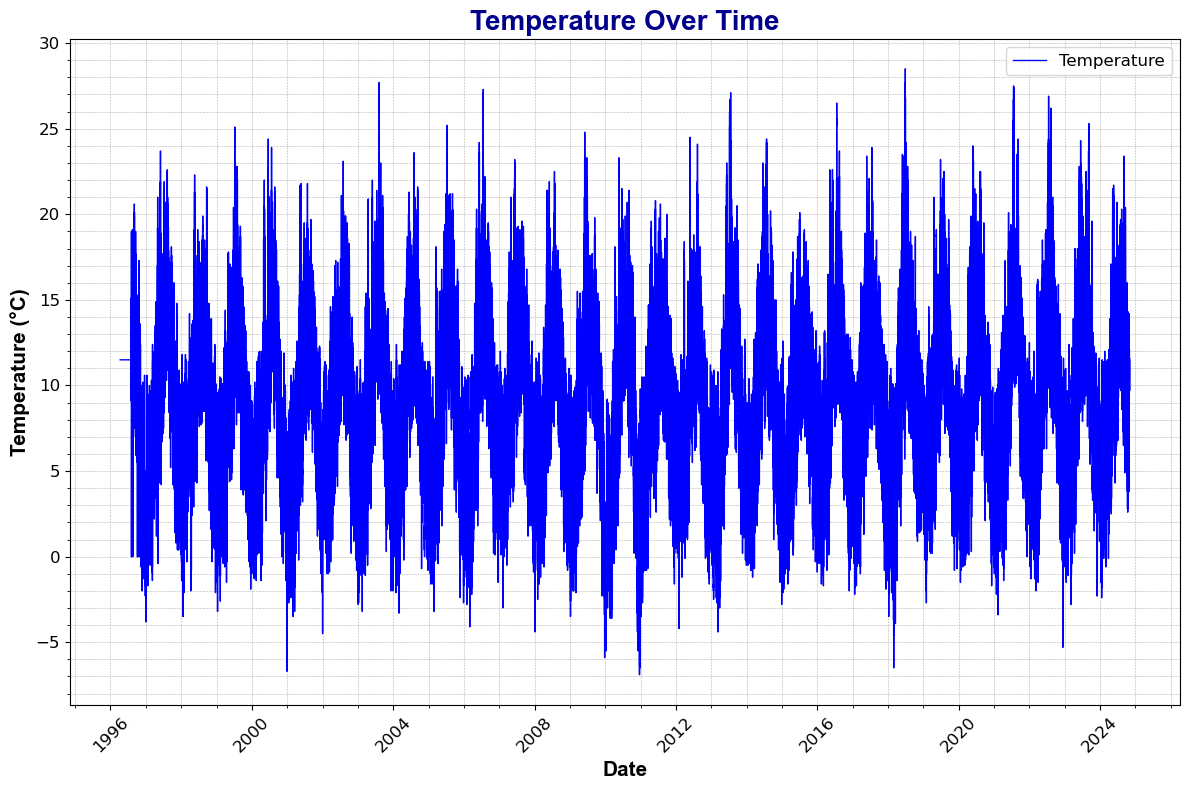

In [8]:
# Adjusted figure size
plt.figure(figsize=(12, 8))

# Plot with Seaborn
sns.lineplot(data=df, x="date", y="temp", color='blue', linestyle='-', linewidth=1)
plt.title('Temperature Over Time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=12)
# Adjust layout to fit labels
plt.tight_layout()
plt.show()


With such a large amount of data, a clear visualization of the results is impossible. A much narrower range of observations can be selected to achieve a more precise result. 

Here is the sample:

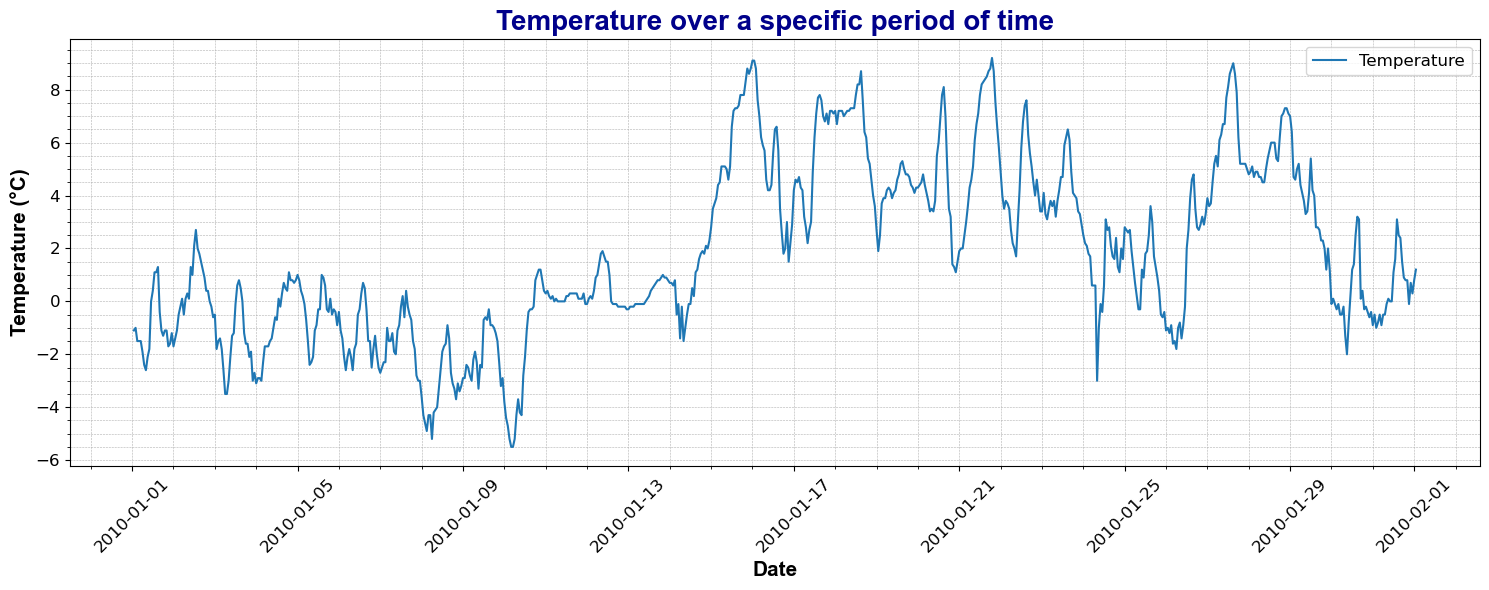

In [9]:
# Filter data for a specific date range 
dateFrom = "2010-01-01 01:00:00"
dateTo = "2010-02-01 01:00:00" 
filteredDf = df.loc[dateFrom:dateTo]

# Plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=filteredDf, x="date", y="temp")
plt.title('Temperature over a specific period of time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=12)
# Adjust layout to fit labels
plt.tight_layout()
plt.show()

***

Plot of mean temperature for each day.

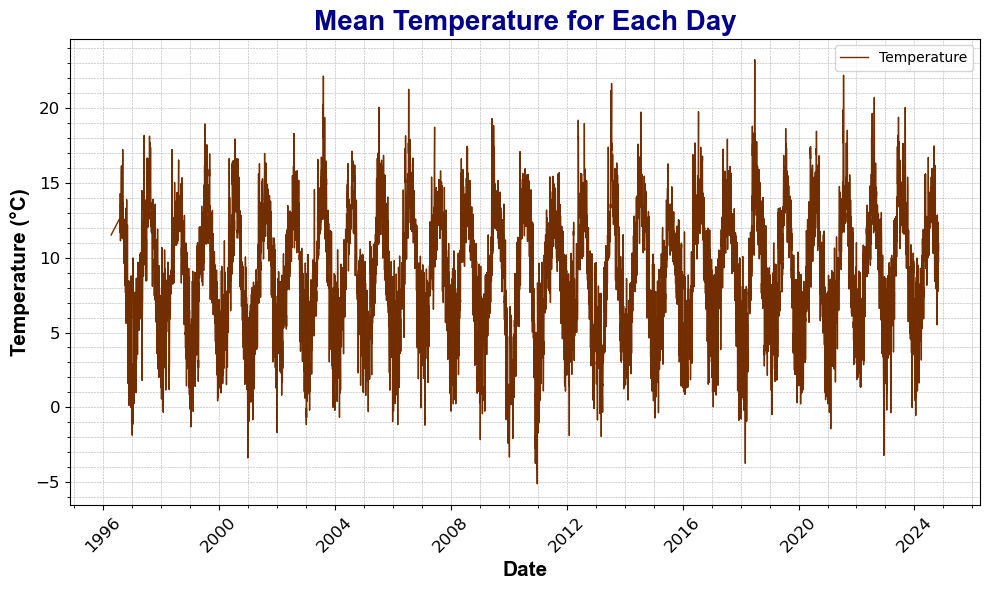

In [10]:
# Calculate the mean temperature for each day
dailyMeanTemp = df['temp'].resample('D').mean()

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dailyMeanTemp, color='#732E00', linestyle='-', linewidth=1)
plt.title('Mean Temperature for Each Day', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=10)
# Adjust layout to fit labels
plt.tight_layout()
plt.show()

As previously mentioned, with that amount of data, it's hard to analyse. Selecting a different amount of data makes the plot much clearer. 

Here is the sample:

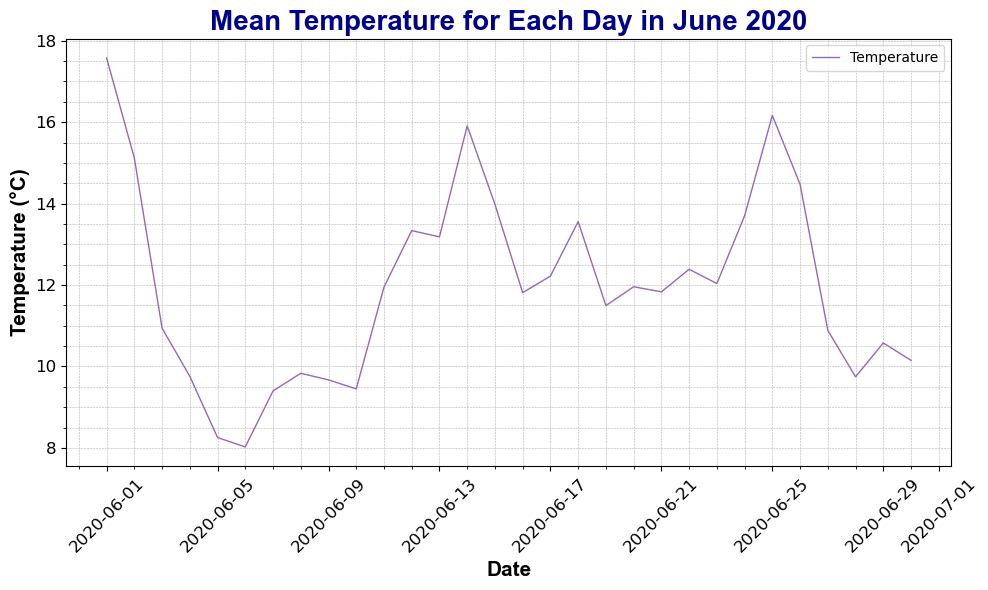

In [11]:
# Filter data for a specific period of time.
startDate = "2020-06-01 01:00:00"
endDate = "2020-06-30 01:00:00"
filteredDf = df.loc[startDate:endDate]

# Calculate the mean temperature for each day in the filtered data
dailyMeanTemp = filteredDf['temp'].resample('D').mean()

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dailyMeanTemp, color='#9467be', linestyle='-', linewidth=1)
plt.title('Mean Temperature for Each Day in June 2020', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

***

Plot of the mean temperature for each month.

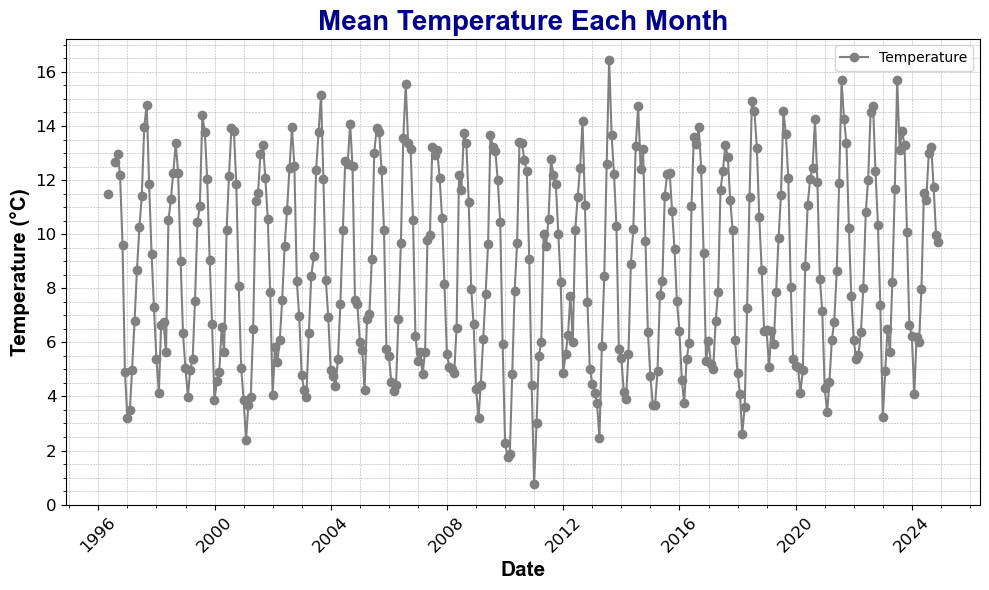

In [12]:
# Calculate the mean temperature for each month
monthlyMeanTemp = df['temp'].resample('M').mean()

# Plot with Matplotlib
plt.figure(figsize=(10, 6))
#sns.lineplot(monthly_mean_temp,  marker='o', markersize=5, color='grey',linestyle='-', linewidth=1 )
plt.plot(monthlyMeanTemp.index, monthlyMeanTemp, marker='o', linestyle='-', color='grey')
plt.title('Mean Temperature Each Month', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

***

Plot the windspeed.

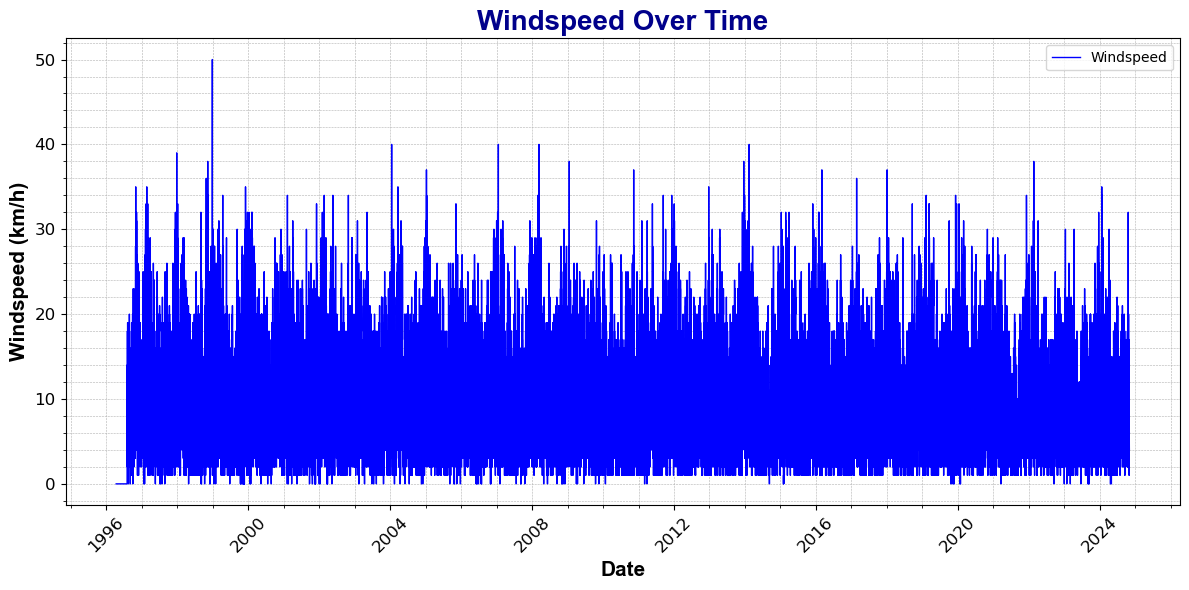

In [13]:
# Convert windspeed to numeric, coercing errors to NaN 
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Handling missing data by forward filling
df['wdsp'].fillna(method='ffill', inplace=True)

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="wdsp", color='blue', linestyle='-', linewidth=1)
#plt.plot(df.index, df['wdsp'], color='blue')
plt.title('Windspeed Over Time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Windspeed'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


Similar to temperatures, the graph becomes unreadable when there is too much data. A narrower data range should be selected for analysis purposes.

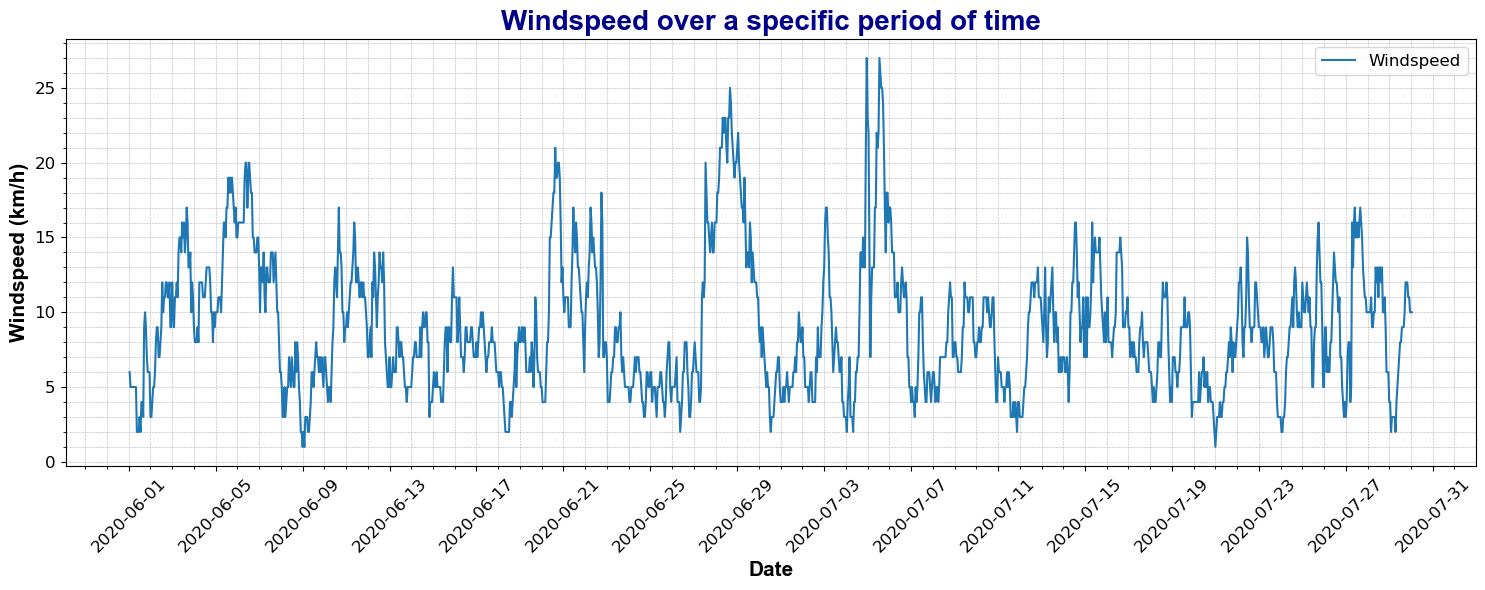

In [14]:
# Filter data for a specific period of time
startDate = "2020-06-01 01:00:00"
endDate = "2020-07-30 01:00:00"
filteredDf = df.loc[startDate:endDate]

# Plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=filteredDf, x=filteredDf.index, y="wdsp")
plt.title('Windspeed over a specific period of time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(['Windspeed'], loc='upper right', fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))  # Set major ticks to every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the ticks to show date only
ax.xaxis.set_minor_locator(mdates.DayLocator())

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


Plot the rolling Windspeed over a 24-hour period.

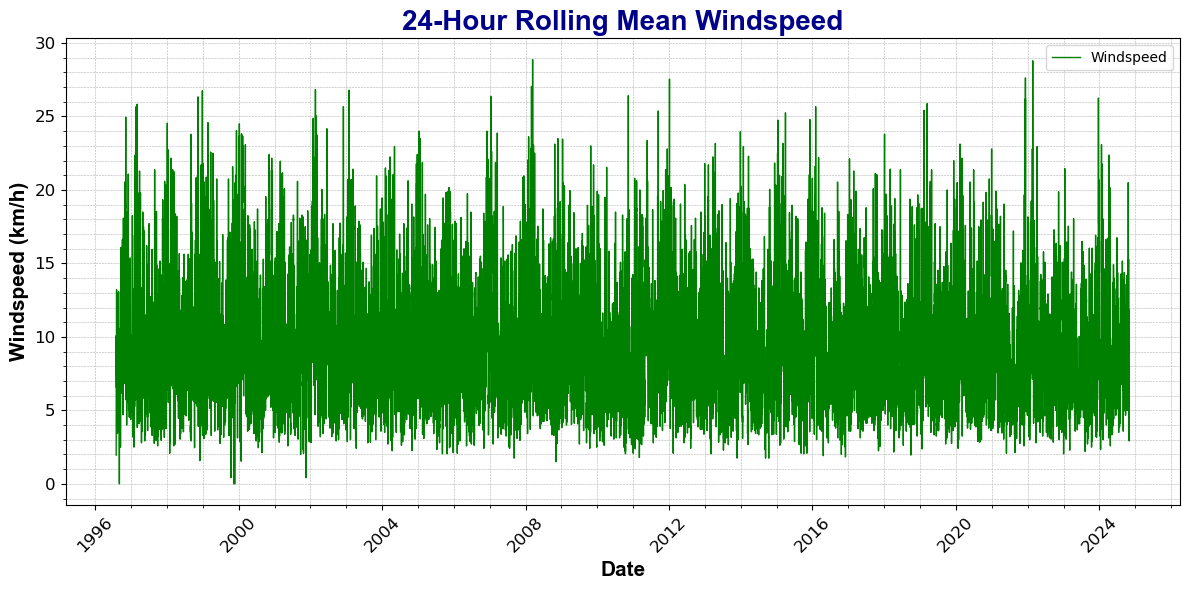

In [15]:
# Calculate the 24-hour rolling mean windspeed
df['rollingWindspeed'] = df['wdsp'].rolling(window=24).mean()

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="rollingWindspeed", color='green', linestyle='-', linewidth=1)
plt.title('24-Hour Rolling Mean Windspeed', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Windspeed'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Plot selected data.

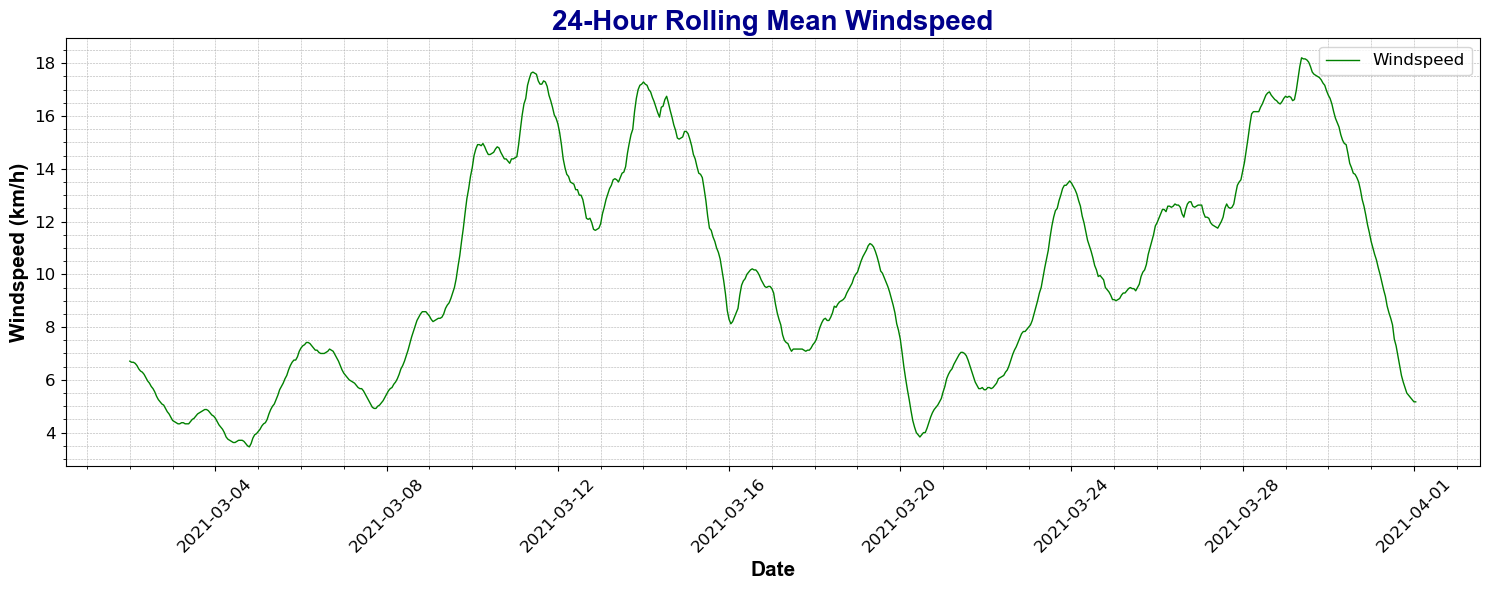

In [16]:
# Filter data for a specific period of time
startDate = "2021-03-01 01:00:00"
endDate = "2021-04-01 01:00:00"
filteredDf = df.loc[startDate:endDate]

# Calculate the 24-hour rolling mean windspeed 
filteredDf.loc[:, 'rollingWindspeed'] = filteredDf['wdsp'].rolling(window=24).mean()

# Plot with Seaborn 
plt.figure(figsize=(15, 6))
sns.lineplot(data=filteredDf, x=filteredDf.index, y="rollingWindspeed", color='green', linestyle='-', linewidth=1)
plt.title('24-Hour Rolling Mean Windspeed', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(['Windspeed'], loc='upper right', fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))  # Set major ticks to every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the ticks to show date only
ax.xaxis.set_minor_locator(mdates.DayLocator())

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


Plot the Max Windspeed for Each Day.

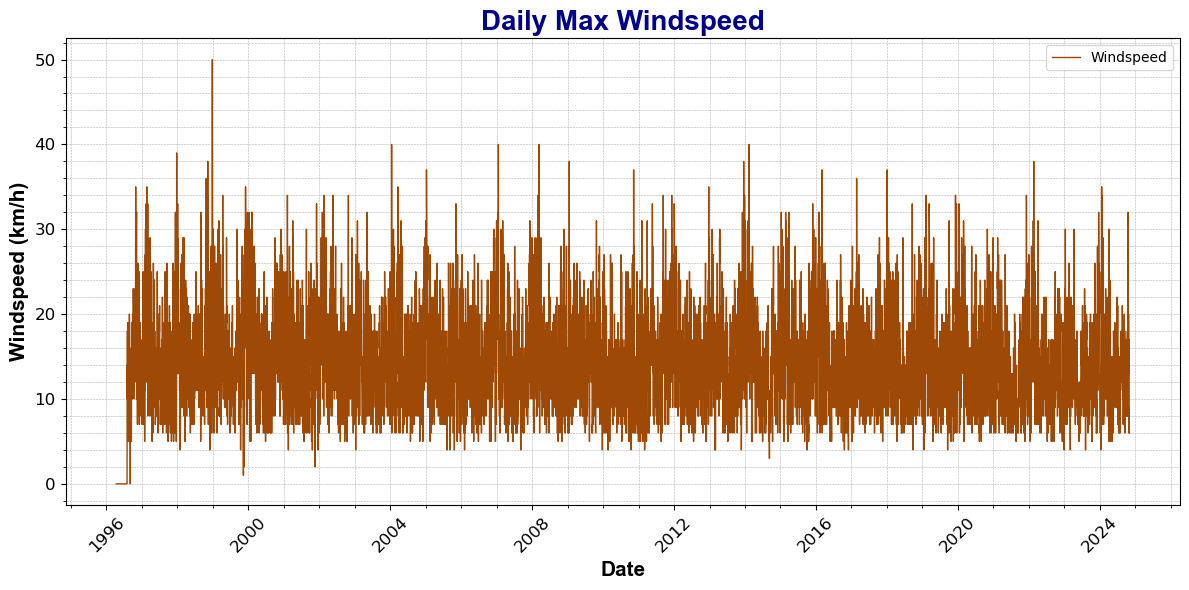

In [17]:
# Calculate the daily max windspeed
dfDailyMax = df['wdsp'].resample('D').max()

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfDailyMax, color='#9E4A06', linestyle='-', linewidth=1)
plt.title('Daily Max Windspeed', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Windspeed'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Every time we need to look at data, it is better to narrow the data.

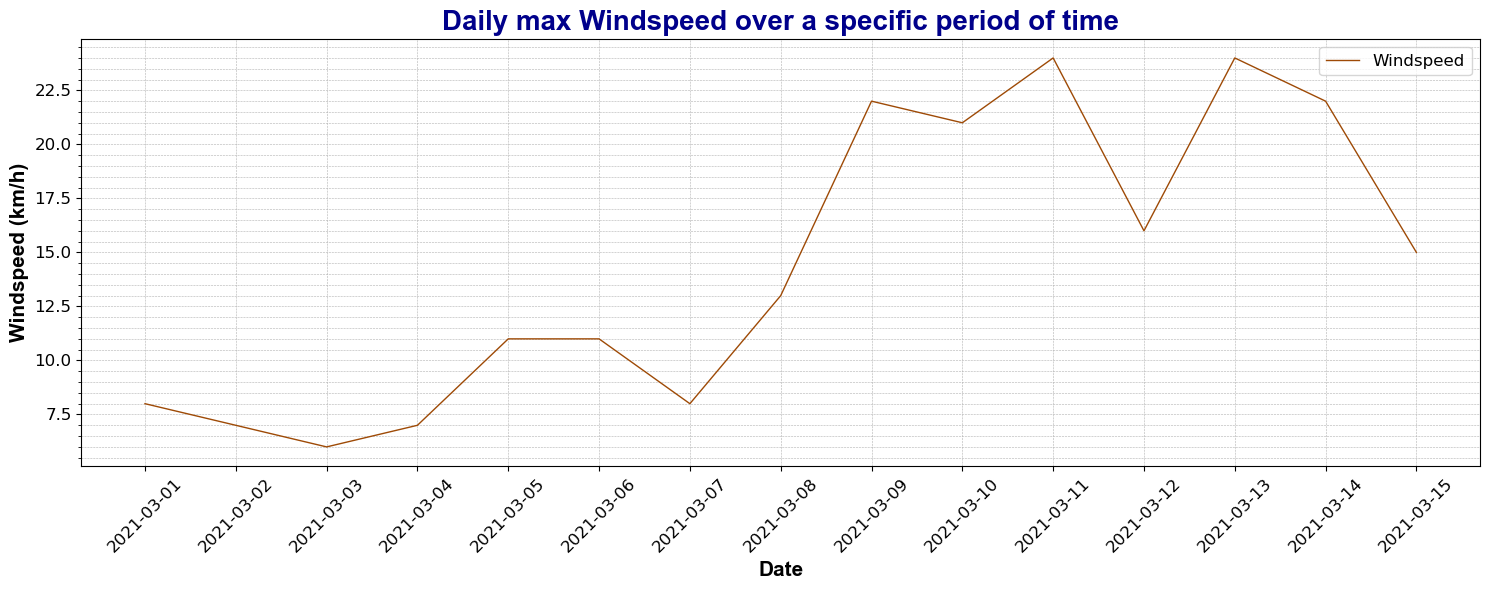

In [19]:
# Filter data for a specific period of time
startDate = "2021-03-01 01:00:00"
endDate = "2021-03-15 01:00:00"
filteredDf = df.loc[startDate:endDate]


# Calculate the daily max windspeed for the filtered data
dailyMaxWindspeed = filteredDf['wdsp'].resample('D').max()

# Plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=dailyMaxWindspeed, color='#9E4A06', linestyle='-', linewidth=1)
plt.title('Daily max Windspeed over a specific period of time', fontsize=20, fontweight='bold', fontname='Arial', color = 'darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(['Windspeed'], loc='upper right', fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set major ticks to every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the ticks to show date only
ax.xaxis.set_minor_locator(mdates.DayLocator())

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


Plot the Monthly Mean of the Daily Max Windspeeds.

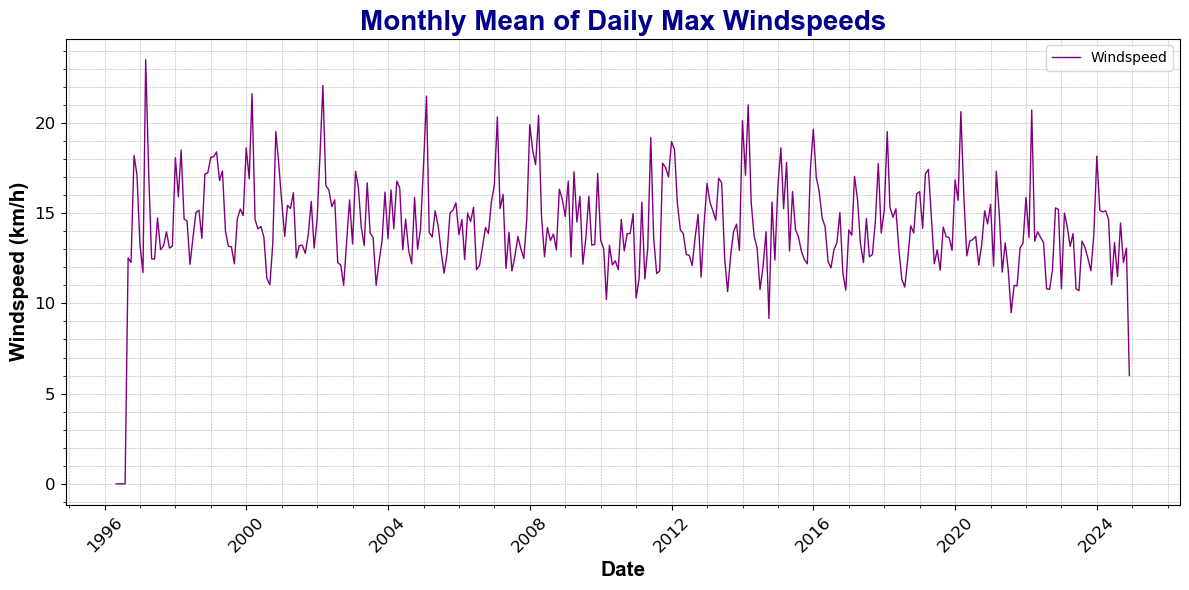

In [21]:
# Calculate the monthly mean of daily max windspeeds
dfMonthlyMeanOfMax = dfDailyMax.resample('M').mean()

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfMonthlyMeanOfMax, color='purple', linestyle='-', linewidth=1)
plt.title('Monthly Mean of Daily Max Windspeeds', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Windspeed'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()